In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
# # 探索偏差方差权衡
import pandas as pd 
import numpy as np 
import seaborn as sns 

In [9]:
# ## Brain and body weight 
 
''' 
这是一个[数据集],
其中包括身体和大脑的平均重量的身体和大脑的重量62种哺乳动物。
把它读pandas并快速浏览一下:
''' 
 
df = pd.read_table('data/x01.txt', sep='\s+', skiprows=33, names=['id','brain','body'], index_col='id') 
print(df.shape)
df.head() 


(62, 2)


,brain,body
id,,
1,3.385,44.5
2,0.480,15.5
3,1.350,8.1
4,465.000,423.0
5,36.330,119.5


In [10]:
# 将专注于一个较小的子集，其中体重小于200： 
df = df[df.body < 200] 
df.shape 
(51, 2)

(51, 2)

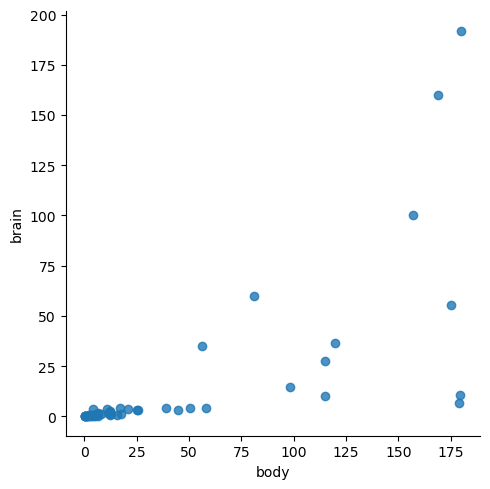

In [11]:
# 创建一个散点图
sns.lmplot(x='body', y='brain', data=df, ci=None, fit_reg=False) 

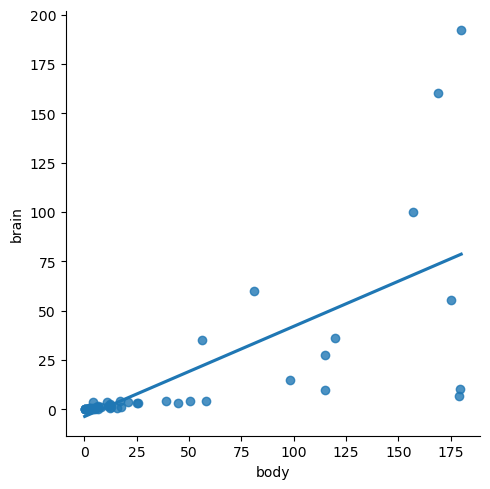

In [12]:
sns.lmplot(x='body', y='brain', data=df, ci=None) 

In [13]:
# 设置一个随机的种子，以实现可重复性 
np.random.seed(12345) 
 
# 将每一行随机分配给样本1或样本2 
df['sample'] = np.random.randint(1, 3, len(df)) 
df.head() 

,brain,body,sample
id,,,
1,3.385,44.5,1
2,0.480,15.5,2
3,1.350,8.1,2
5,36.330,119.5,2
6,27.660,115.0,1


In [14]:
# 比较一下这两个样本，它们是相当不同的! 
df.groupby('sample')[['brain', 'body']].mean() 

,brain,body
sample,,
1,18.113778,52.068889
2,13.323364,34.669091


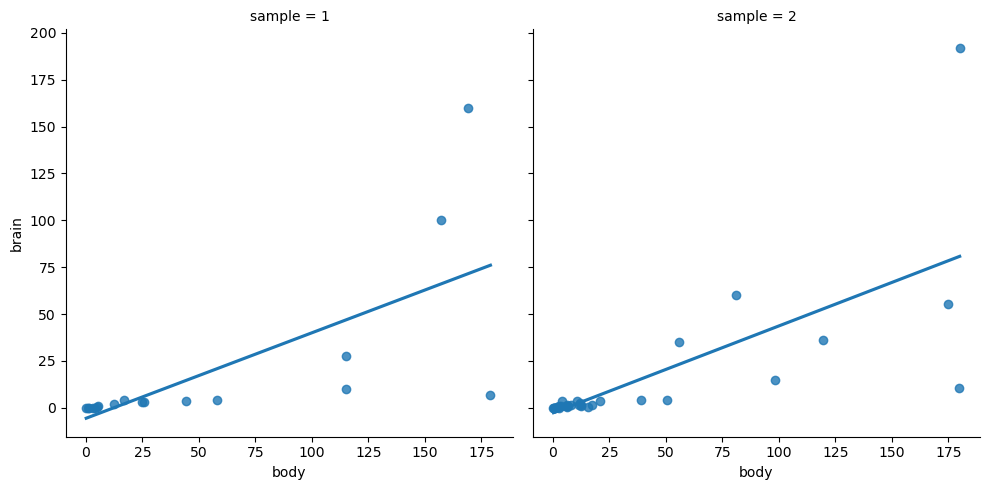

In [15]:
#col='sample'按sample对数据进行子集，并创建两个独立的图。
sns.lmplot(x='body', y='brain', data=df, ci=None, col='sample') 

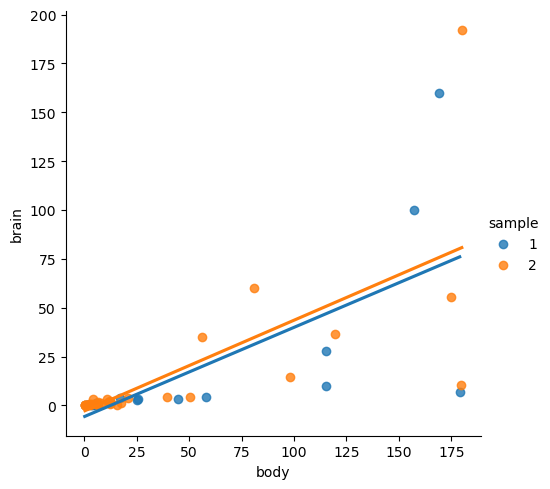

In [16]:
# hue='sample'按sample对数据进行子集，并创建一个单一的图。
sns.lmplot(x='body', y='brain', data=df, ci=None, hue='sample') 

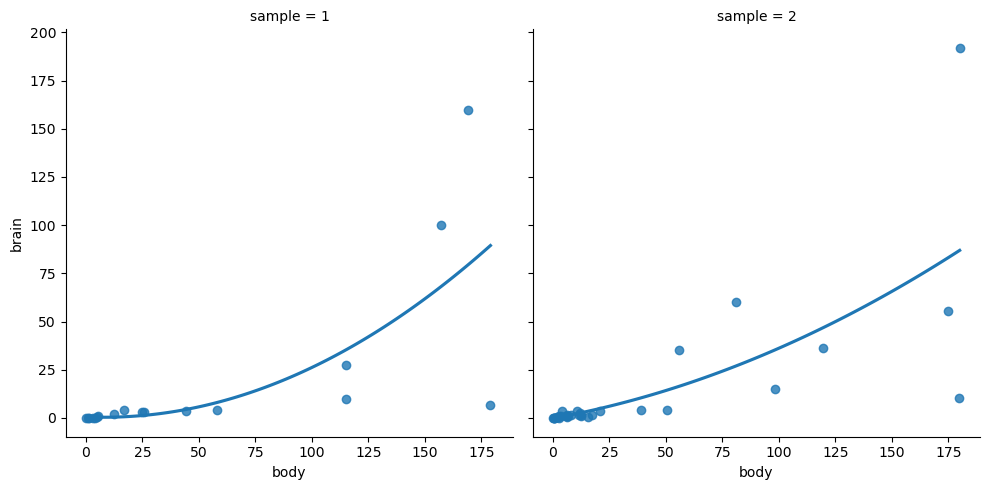

In [17]:
# 尝试用二阶多项式来代替： 
sns.lmplot(x='body', y='brain', data=df, ci=None, col='sample', order=2) 

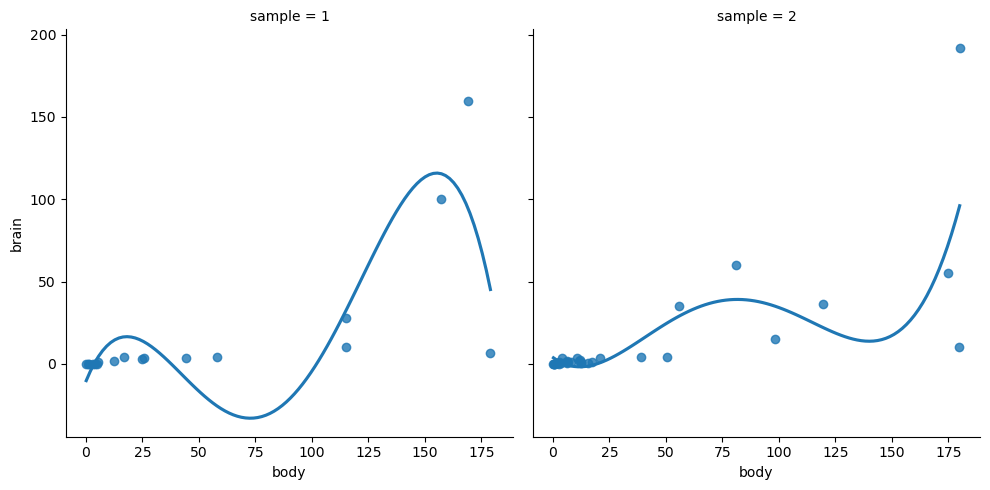

In [18]:
# 一个低偏差、高方差的模型会是什么样子？试试多项式回归，用一个四阶多项式： 
sns.lmplot(x='body', y='brain', data=df, ci=None,  col='sample', order=4) 

In [19]:
from sklearn.neighbors import KNeighborsClassifier 
# 读入iris数据 
from sklearn.datasets import load_iris 
iris = load_iris() 
X, y = iris.data, iris.target 

In [20]:
knn = KNeighborsClassifier(n_neighbors=1) 
knn.fit(X, y) 
knn.score(X, y) 
1.0 

1.0

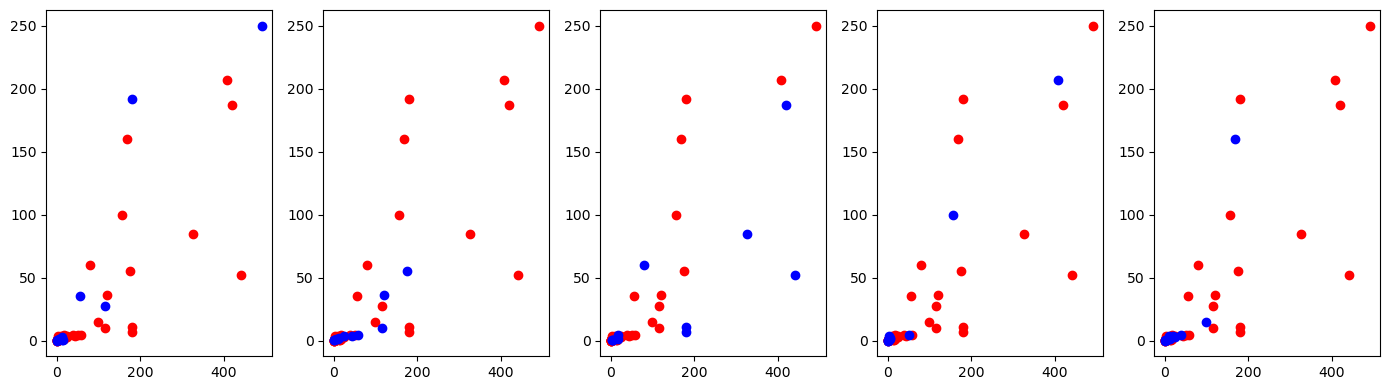

In [24]:
import matplotlib.pyplot as plt 
from sklearn.model_selection import KFold 
 
df = pd.read_table('data/x01.txt', sep='\s+', skiprows=33, names=['id','brain','body']) 
df = df[df.brain < 300][df.body < 500] 
# 能见度的限制点 
nfolds = 5 
fig, axes = plt.subplots(1, nfolds, figsize=(14,4)) 
for i, fold in enumerate(KFold(n_splits=nfolds, shuffle=True).split(df)): 
    training, validation = fold 
    x, y = df.iloc[training]['body'], df.iloc[training]['brain'] 
    axes[i].plot(x, y, 'ro') 
    x, y = df.iloc[validation]['body'], df.iloc[validation]['brain'] 
    axes[i].plot(x, y, 'bo') 
plt.tight_layout() 
plt.show()

In [27]:
from sklearn.neighbors import KNeighborsClassifier 
# 读取iris数据集 
from sklearn.datasets import load_iris 
iris = load_iris() 
knn = KNeighborsClassifier(n_neighbors=1) 
X, y = iris.data, iris.target 
knn.fit(X, y) 
knn.score(X, y) 
# 使用训练集和测试集是非常重要的，同样重要的是交叉验证。
# 请记住交叉验证是使用几个不同的训练测试分割并平均化结果! 
## 交叉验证
# check CV score for K=1 
from sklearn.model_selection import cross_val_score, train_test_split 
tree = KNeighborsClassifier(n_neighbors=1) 
scores = cross_val_score(tree, X, y, cv=5, scoring='accuracy') 
scores.mean() 

0.96

In [28]:
# check CV score for K=5 
knn = KNeighborsClassifier(n_neighbors=5) 
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy') 
scores 
np.mean(scores) 

0.9733333333333334

In [29]:
# 寻找K的最佳值 
k_range = range(1, 30, 2) # [1, 3, 5, 7, ..., 27, 29] 
errors = [] 
for k in k_range: 
        knn = KNeighborsClassifier(n_neighbors=k) 
           # 实例化一个有k个邻居的KNN 
        scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy') 
         # 获得我们的五个准确度分数 
        accuracy = np.mean(scores) 
           # 把它们平均起来 
        error = 1 - accuracy 
           # 得到我们的误差，也就是1减去准确度。
        errors.append(error) 
           # 记下错误清单

Text(0, 0.5, 'Error')

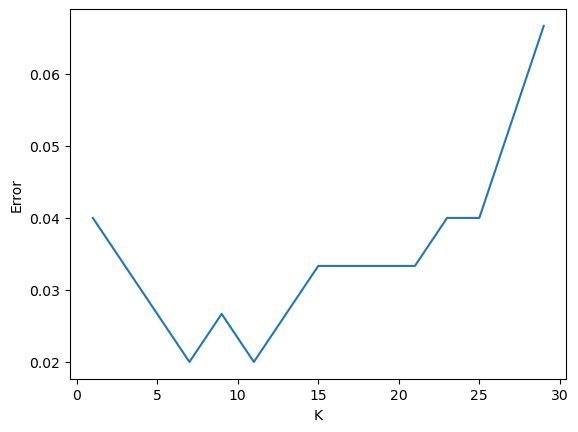

In [30]:
# 绘制K值（X轴）与5倍CV得分（Y轴）的对比图 
plt.figure() 
plt.plot(k_range, errors) 
plt.xlabel('K') 
plt.ylabel('Error') 

In [32]:
from sklearn.model_selection import GridSearchCV 
from sklearn.neighbors import KNeighborsClassifier
# 导入网格搜索模块 
knn = KNeighborsClassifier(n_jobs=-1) 
# instantiate a blank slate KNN, no neighbors 
k_range = list(range(1, 31, 2))
print(k_range)
#k_range = range(1, 30) 
param_grid = dict(n_neighbors=k_range) 
# param_grid = {"n_ neighbors": [1, 3, 5, ...]} 
print(param_grid)
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy') 
grid.fit(X, y) 

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]
{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]}


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=-1),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29]},
             scoring='accuracy')

[0.96       0.96666667 0.97333333 0.98       0.97333333 0.98
 0.97333333 0.96666667 0.96666667 0.96666667 0.96666667 0.96
 0.96       0.94666667 0.93333333]
7
0.9800000000000001


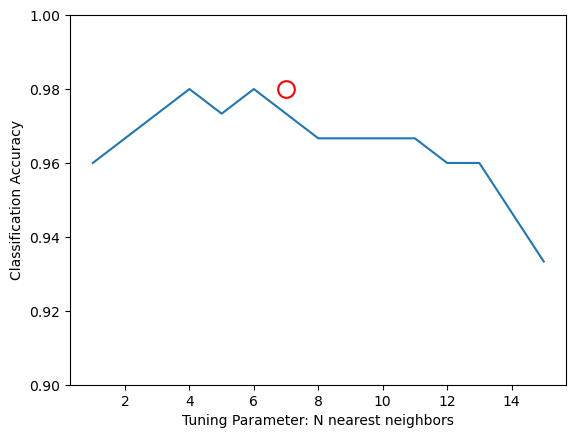

In [55]:
# check the results of the grid search 
grid.cv_results_ 
grid_mean_scores = grid.cv_results_['mean_test_score'] 
# this is a list of the average accuracies for each parameter  
# combination 
plt.figure() 
plt.ylim([0.9, 1]) 
plt.xlabel('Tuning Parameter: N nearest neighbors') 
plt.ylabel('Classification Accuracy') 
plt.plot(k_range, grid_mean_scores) 
plt.plot(grid.best_params_['n_neighbors'], grid.best_score_, marker='o', markersize=12, markeredgewidth=1.5, 
         markerfacecolor='None', markeredgecolor='r', linestyle='None')
print(grid.best_params_['n_neighbors'])
print(grid.best_score_)

In [56]:
grid.best_estimator_
# 实际返回具有最佳参数的不适合模型
# KNeighborsClassifier(algorithm='auto', leaf_size=30,metric=('minkowski', metric_params= None, n_jobs=1, n_neighbors=7, p=2, weights='uniform' )

KNeighborsClassifier(n_jobs=-1, n_neighbors=7)

Text(0, 0.5, 'RMSE')

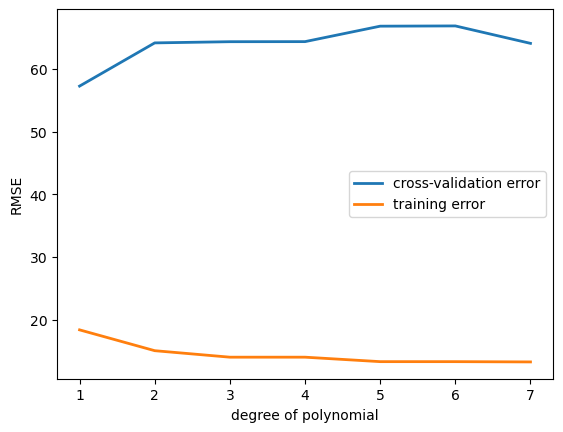

In [57]:
# 这个函数使用numpy多项式拟合函数来 
# 计算给定X和y的RMSE 
def rmse(x, y, coefs): 
    yfit = np.polyval(coefs, x) 
    rmse = np.sqrt(np.mean((y - yfit) ** 2)) 
    return rmse 
 
xtrain, xtest, ytrain, ytest = train_test_split(df['body'], df['brain']) 
 
train_err = [] 
validation_err = [] 
degrees = range(1, 8) 
 
for i, d in enumerate(degrees): 
    p = np.polyfit(xtrain, ytrain, d) 
  # built in numpy polynomial fit function 
    train_err.append(rmse(xtrain, ytrain, p)) 
    validation_err.append(rmse(xtest, ytest, p)) 
 
fig, ax = plt.subplots() 
# begin to make our graph 
 
ax.plot(degrees, validation_err, lw=2, label = 'cross-validation error') 
ax.plot(degrees, train_err, lw=2, label = 'training error') 
# Our two curves, one for training error, the other for cross validation 
 
ax.legend(loc=0) 
ax.set_xlabel('degree of polynomial') 
ax.set_ylabel('RMSE') 

In [58]:
# ENSEMBLING 
 
import numpy as np 
 
# 为可重复性设置种子 
np.random.seed(12345) 
 
# 为每个模型生成1000个随机数（在0和1之间），代表1000个观测值 
mod1 = np.random.rand(2000) 
mod2 = np.random.rand(2000) 
mod3 = np.random.rand(2000) 
mod4 = np.random.rand(2000) 
mod5 = np.random.rand(2000) 


In [59]:
# each model independently predicts 1 (the "correct response") if random number was at least 0.4 
preds1 = np.where(mod1 > 0.4, 1, 0) 
preds2 = np.where(mod2 > 0.4, 1, 0) 
preds3 = np.where(mod3 > 0.4, 1, 0) 
preds4 = np.where(mod4 > 0.4, 1, 0) 
preds5 = np.where(mod5 > 0.4, 1, 0) 
 
print(preds1.mean()) 
# 0.596
print (preds2.mean()) 
# 0.6065
print (preds3.mean()) 
# 0.591
print (preds4.mean()) 
# 0.5965
print( preds5.mean()) 
# 0.611
 
#  每个模型的 "准确率约为60%"。

0.596
0.6065
0.591
0.5965
0.611


0.611

In [60]:
# 预测结果的平均值，然后四舍五入到0或1。
ensemble_preds = np.round((preds1 + preds2 + preds3 + preds4 + preds5)/5.0).astype(int) 
ensemble_preds.mean() 

0.674

In [61]:
# set a seed for reproducibility 
np.random.seed(1) 
# create an array of 1 through 20 
nums = np.arange(1, 21) 
print(nums) 
# sample that array 20 times with replacement 
np.random.choice(a=nums, size=20, replace=True) 
# 这是引导样本，注意它有重复的变量! 

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


array([ 6, 12, 13,  9, 10, 12,  6, 16,  1, 17,  2, 13,  8, 14,  7, 19,  6,
       19, 12, 11])

In [63]:
# 读入数据 
url = 'data/hitters.csv' 
 
hitters = pd.read_csv(url) 
# 删除缺失值的行 
hitters.dropna(inplace=True) 
 
# 将分类变量编码为整数 
hitters['League'] = pd.factorize(hitters.League)[0] 
hitters['Division'] = pd.factorize(hitters.Division)[0] 
hitters['NewLeague'] = pd.factorize(hitters.NewLeague)[0] 

# 定义特征：排除职业统计（以 "C "开头）和回应（薪金）。
feature_cols = [h for h in hitters.columns if h[0] != 'C' and h != 'Salary'] 
# 定义X和y 
X = hitters[feature_cols] 
y = hitters.Salary 

Text(0, 0.5, 'RMSE (lower is better)')

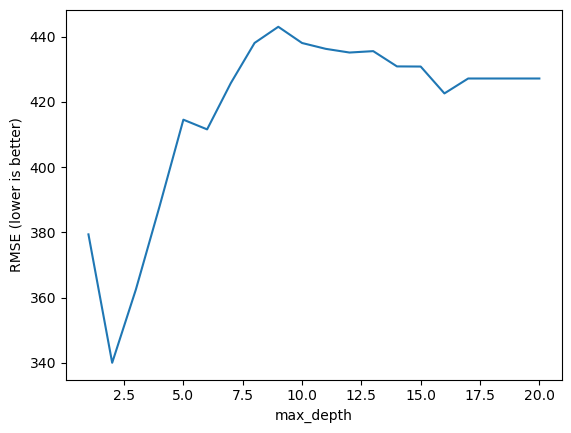

In [66]:
from sklearn.tree import DecisionTreeRegressor 
 
# 最大深度的尝试值的列表
max_depth_range = range(1, 21) 
 
# 列表来存储每个max_depth值的平均RMSE
RMSE_scores = [] 
 
# 对每个max_depth的值使用10倍交叉验证法
from sklearn.model_selection import cross_val_score 
for depth in max_depth_range: 
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1) 
    MSE_scores = cross_val_score(treereg, X, y, cv=10, scoring='neg_mean_squared_error') 
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores))) 
 
# 绘制max_depth（x轴）与RMSE（y轴）的对比图。
plt.plot(max_depth_range, RMSE_scores) 
plt.xlabel('max_depth') 
plt.ylabel('RMSE (lower is better)') 
